<a href="https://colab.research.google.com/github/KevinGastelum/myMachineLearning/blob/main/CryptoPricePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Crypto Price Prediction for:** BTC, ETH, BNB, USDT

Crypto Dataset using Prices from <br>
November 9th 2017 - August 4th 2022

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/crypto_prices_data.csv')

In [4]:
data.head()

Unnamed: 0        Date  Adj Close (BNB)  Volume (BNB)  Adj Close (BTC)  \
0           0   11/9/2017          1.99077      19192200      7143.580078   
1           1  11/10/2017          1.79684      11155000      6618.140137   
2           2  11/11/2017          1.67047       8178150      6357.600098   
3           3  11/12/2017          1.51969      15298700      5950.069824   
4           4  11/13/2017          1.68662      12238800      6559.490234   

   Volume (BTC)  Adj Close (USDT)  Volume (USDT)  Adj Close (ETH)  \
0    3226249984           1.00818      358188000       320.884003   
1    5208249856           1.00601      756446016       299.252991   
2    4908680192           1.00899      746227968       314.681000   
3    8957349888           1.01247     1466060032       307.907990   
4    6263249920           1.00935      767884032       316.716003   

   Volume (ETH)  
0     893249984  
1     885985984  
2     842300992  
3    1613479936  
4    1041889984

In [5]:
data = data.drop(columns = ['Unnamed: 0'])

In [6]:
data.head()

Date  Adj Close (BNB)  Volume (BNB)  Adj Close (BTC)  Volume (BTC)  \
0   11/9/2017          1.99077      19192200      7143.580078    3226249984   
1  11/10/2017          1.79684      11155000      6618.140137    5208249856   
2  11/11/2017          1.67047       8178150      6357.600098    4908680192   
3  11/12/2017          1.51969      15298700      5950.069824    8957349888   
4  11/13/2017          1.68662      12238800      6559.490234    6263249920   

   Adj Close (USDT)  Volume (USDT)  Adj Close (ETH)  Volume (ETH)  
0           1.00818      358188000       320.884003     893249984  
1           1.00601      756446016       299.252991     885985984  
2           1.00899      746227968       314.681000     842300992  
3           1.01247     1466060032       307.907990    1613479936  
4           1.00935      767884032       316.716003    1041889984

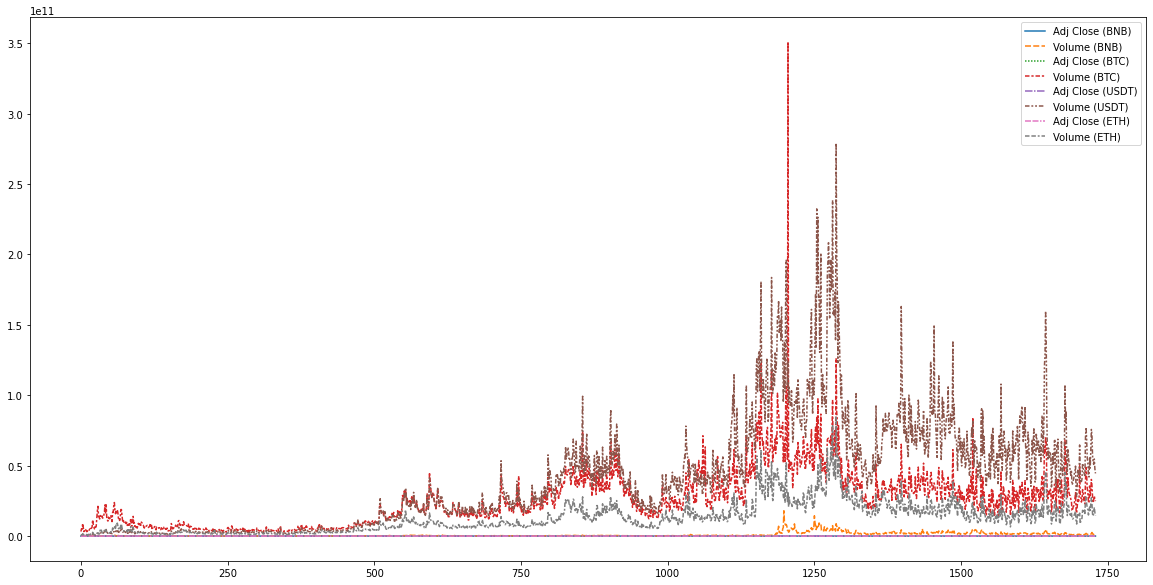

In [7]:
plt.figure(figsize = (20, 10))
sns.lineplot(data=data)

In [8]:
data.head()

Date  Adj Close (BNB)  Volume (BNB)  Adj Close (BTC)  Volume (BTC)  \
0   11/9/2017          1.99077      19192200      7143.580078    3226249984   
1  11/10/2017          1.79684      11155000      6618.140137    5208249856   
2  11/11/2017          1.67047       8178150      6357.600098    4908680192   
3  11/12/2017          1.51969      15298700      5950.069824    8957349888   
4  11/13/2017          1.68662      12238800      6559.490234    6263249920   

   Adj Close (USDT)  Volume (USDT)  Adj Close (ETH)  Volume (ETH)  
0           1.00818      358188000       320.884003     893249984  
1           1.00601      756446016       299.252991     885985984  
2           1.00899      746227968       314.681000     842300992  
3           1.01247     1466060032       307.907990    1613479936  
4           1.00935      767884032       316.716003    1041889984

Text(0.5, 1.0, 'Adjacent Close Price')

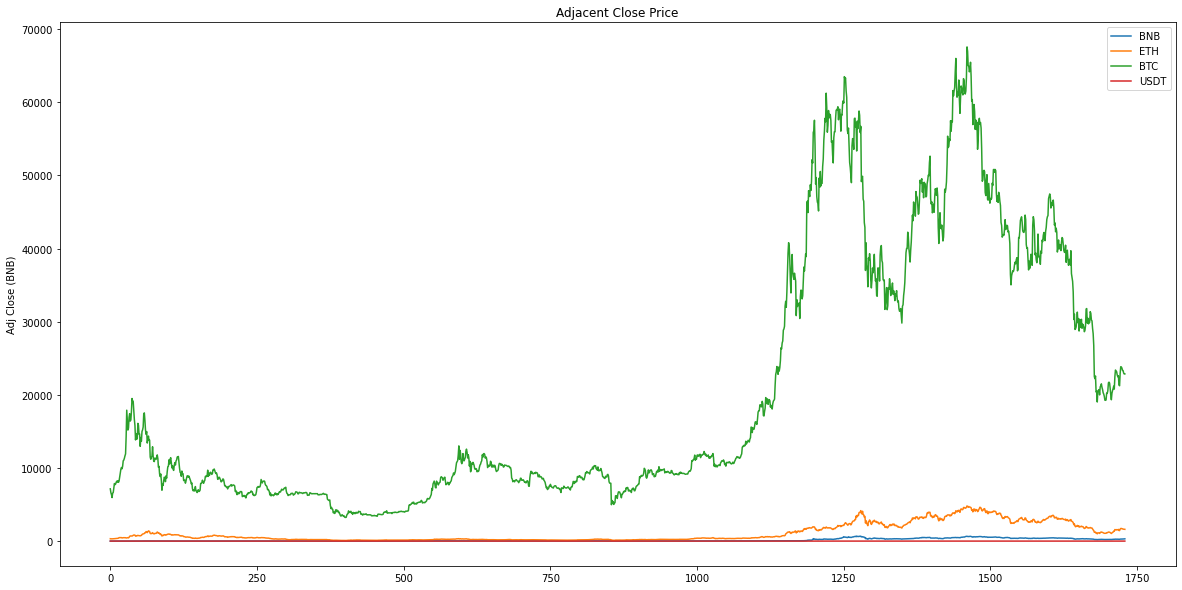

In [9]:
plt.figure(figsize = (20, 10))
sns.lineplot(data = data['Adj Close (BNB)'], label = 'BNB')
sns.lineplot(data = data['Adj Close (ETH)'], label = 'ETH')
sns.lineplot(data = data['Adj Close (BTC)'], label = 'BTC')
sns.lineplot(data = data['Adj Close (USDT)'], label = 'USDT')
plt.title('Adjacent Close Price')

Text(0.5, 1.0, 'Volume')

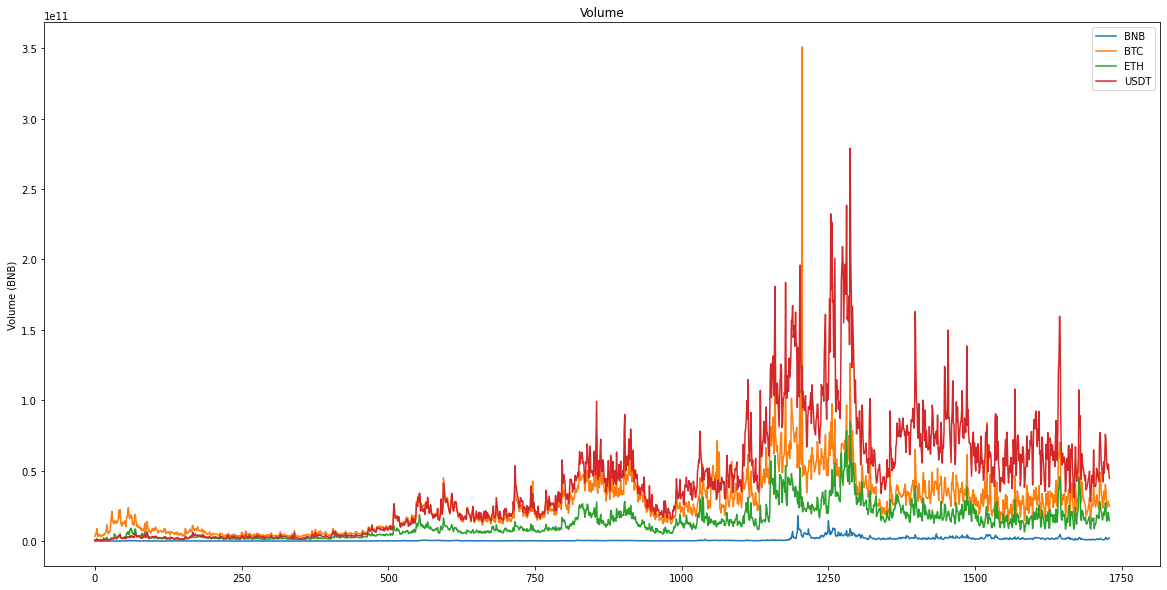

In [10]:
plt.figure(figsize = (20, 10))
sns.lineplot(data = data['Volume (BNB)'], label = 'BNB')
sns.lineplot(data = data['Volume (BTC)'], label = 'BTC')
sns.lineplot(data = data['Volume (ETH)'], label = 'ETH')
sns.lineplot(data = data['Volume (USDT)'], label = 'USDT')
plt.title('Volume')

Checking Correlation

In [11]:
data.corr()

Adj Close (BNB)  Volume (BNB)  Adj Close (BTC)  \
Adj Close (BNB)          1.000000      0.732715         0.918562   
Volume (BNB)             0.732715      1.000000         0.768149   
Adj Close (BTC)          0.918562      0.768149         1.000000   
Volume (BTC)             0.407226      0.600409         0.573059   
Adj Close (USDT)        -0.154652     -0.117310        -0.151540   
Volume (USDT)            0.659554      0.773426         0.773313   
Adj Close (ETH)          0.962406      0.654506         0.926972   
Volume (ETH)             0.569978      0.699198         0.672594   

                  Volume (BTC)  Adj Close (USDT)  Volume (USDT)  \
Adj Close (BNB)       0.407226         -0.154652       0.659554   
Volume (BNB)          0.600409         -0.117310       0.773426   
Adj Close (BTC)       0.573059         -0.151540       0.773313   
Volume (BTC)          1.000000         -0.095888       0.867511   
Adj Close (USDT)     -0.095888          1.000000      -0.139902   
Volume (USDT)         0.867511         -0.139902       1.000000   
Adj Close (ETH)       0.383787         -0.149685       0.629372   
Volume (ETH)          0.859965         -0.119487       0.948139   

                  Adj Close (ETH)  Volume (ETH)  
Adj Close (BNB)          0.962406      0.569978  
Volume (BNB)             0.654506      0.699198  
Adj Close (BTC)          0.926972      0.672594  
Volume (BTC)             0.383787      0.859965  
Adj Close (USDT)        -0.149685     -0.119487  
Volume (USDT)            0.629372      0.948139  
Adj Close (ETH)          1.000000      0.545473  
Volume (ETH)             0.545473      1.000000

In [12]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [13]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Training our Model

In [17]:
X = data.loc[:, ['Adj Close (BNB)', 'Adj Close (USDT)', 'Adj Close (ETH)']]
y = data.loc[:, 'Adj Close (BNB)']

In [18]:
X.head()

Adj Close (BNB)  Adj Close (USDT)  Adj Close (ETH)
0          1.99077           1.00818       320.884003
1          1.79684           1.00601       299.252991
2          1.67047           1.00899       314.681000
3          1.51969           1.01247       307.907990
4          1.68662           1.00935       316.716003

In [19]:
y.head()

0    1.99077
1    1.79684
2    1.67047
3    1.51969
4    1.68662
Name: Adj Close (BNB), dtype: float64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [22]:
regressor = RandomForestRegressor(n_estimators=1000)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [23]:
y_pred = regressor.predict(X_test)
error_score = metrics.r2_score(y_test, y_pred)
print("R squared error : ", error_score)

R squared error :  0.9999681937237005
